In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import functools

%matplotlib inline

In [3]:
case_dir = 'conan'

In [4]:
# dfs = []
# for d in ['energyInletFuel', 'energyInletAir', 'energyOutlet']:
#     df = pd.read_csv(os.path.join(case_dir, 'postProcessing', d, '0', 'surfaceFieldValue.dat'),
#                      comment='#', sep='\s+', header=None)
#     df.columns = ['Time', d]
#     dfs.append(df)

# energy = functools.reduce(lambda left,right: pd.merge(left,right,on='Time'), dfs)
    
# dfs = []
# for d in ['massInletFuel', 'massInletAir', 'massOutlet']:
#     df = pd.read_csv(os.path.join(case_dir, 'postProcessing/topAir/patchFieldFlow_patchFlows', d, '0', 'surfaceFieldValue.dat'),
#                      comment='#', sep='\s+', header=None)
#     df.columns = ['Time', d]
#     dfs.append(df)
# mass = functools.reduce(lambda left,right: pd.merge(left,right,on='Time'), dfs)


air_flow = pd.read_csv(
    os.path.join(case_dir, 'postProcessing', 'topAir', 'patchFieldFlow_patchFlows', '0', 'AIR'),
    comment='#', sep='\s+', names=['Time', 'leftLet', 'rightLet'])

vapor_flow = pd.read_csv(
    os.path.join(case_dir, 'postProcessing', 'topAir', 'patchFieldFlow_patchFlows', '0', 'H2O'),
    comment='#', sep='\s+', names=['Time', 'leftLet', 'rightLet'])

condensation = pd.read_csv(
    os.path.join(case_dir, 'postProcessing', 'topAir', 'patchIntegrate_wallFluxes', '0', 'H2OMassFlux'),
    comment='#', sep='\s+', names=['Time', 'topAir_to_wall'])

dfs = []
dfs.append(pd.read_csv(
    os.path.join(case_dir, 'postProcessing', 'topAir', 'volumeIntegrate_totalFluidMass', '0', 'rho'),
    comment='#', sep='\s+', names=['Time', 'rho'])
)

dfs.append(pd.read_csv(
    os.path.join(case_dir, 'postProcessing', 'topAir', 'volumeIntegrate_totalFluidMass', '0', 'densityFluidAIR'),
    comment='#', sep='\s+', names=['Time', 'rhoAIR'])
)

dfs.append(pd.read_csv(
    os.path.join(case_dir, 'postProcessing', 'topAir', 'volumeIntegrate_totalFluidMass', '0', 'densityFluidH2O'),
    comment='#', sep='\s+', names=['Time', 'rhoH2O'])
)

mass = functools.reduce(lambda left,right: pd.merge(left,right,on='Time'), dfs)

In [5]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0

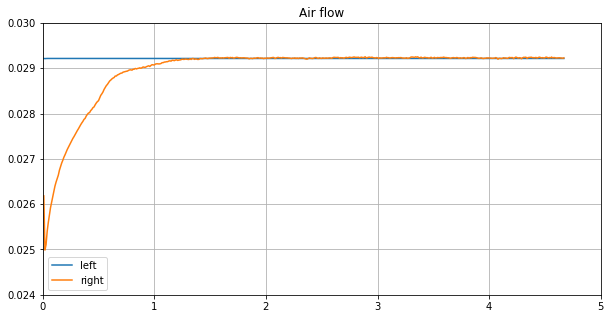

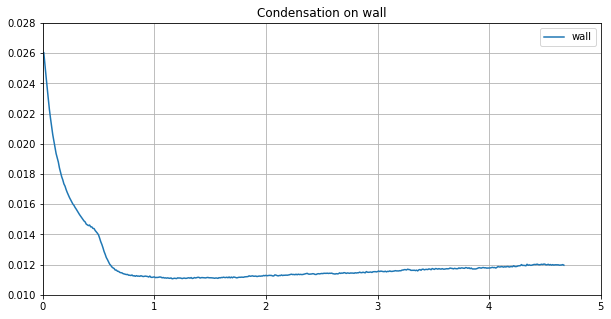

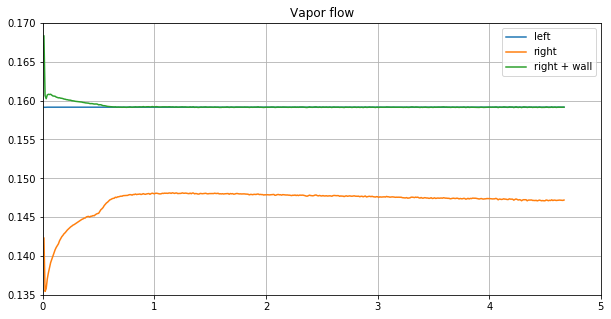

In [6]:
plt.title('Air flow')
plt.plot(air_flow['Time'], -air_flow['leftLet'], label='left')
plt.plot(air_flow['Time'], air_flow['rightLet'], label='right')
plt.legend()
plt.grid(True)
plt.show()

plt.title('Condensation on wall')
plt.plot(condensation['Time'], condensation['topAir_to_wall'], label='wall')
plt.legend()
plt.grid(True)
plt.show()

plt.title('Vapor flow')
plt.plot(vapor_flow['Time'], -vapor_flow['leftLet'], label='left')
plt.plot(vapor_flow['Time'], vapor_flow['rightLet'], label='right')
plt.plot(vapor_flow['Time'], vapor_flow['rightLet'] + condensation['topAir_to_wall'], label='right + wall')
plt.legend()
plt.grid(True)
plt.show()


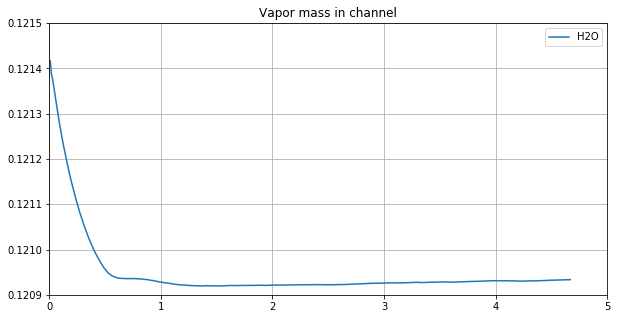

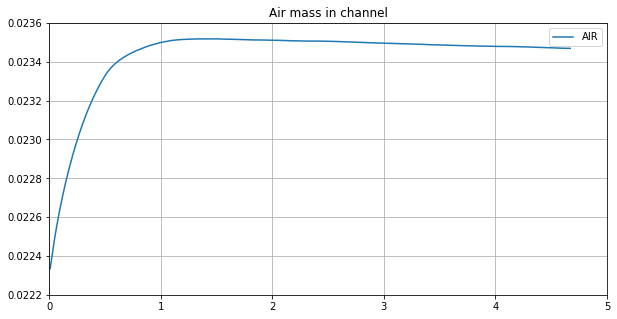

In [7]:
plt.title('Vapor mass in channel')
plt.plot(mass['Time'], mass['rhoH2O'], label='H2O')
plt.legend()
plt.grid(True)
plt.show()

plt.title('Air mass in channel')
plt.plot(mass['Time'], mass['rhoAIR'], label='AIR')
plt.legend()
plt.grid(True)
plt.show()


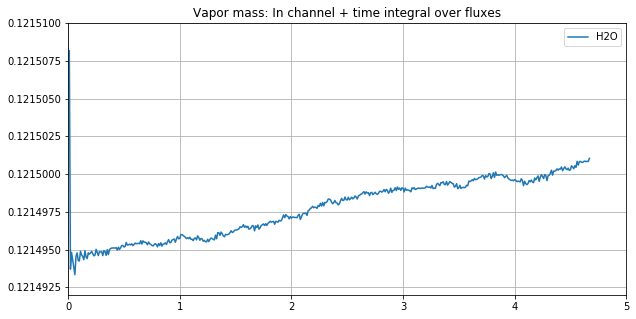

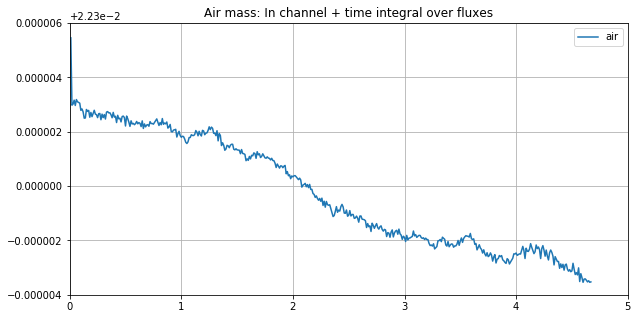

In [8]:
flux_H2O_sum = np.cumsum(vapor_flow['leftLet'] + vapor_flow['rightLet'] + condensation['topAir_to_wall']) * 0.01

plt.title('Vapor mass: In channel + time integral over fluxes')
plt.plot(mass['Time'], mass['rhoH2O'] + flux_H2O_sum, label='H2O')
plt.legend()
plt.grid(True)
plt.show()

flux_air_sum = np.cumsum(air_flow['leftLet'] + air_flow['rightLet']) * 0.01

plt.title('Air mass: In channel + time integral over fluxes')
plt.plot(mass['Time'], mass['rhoAIR'] + flux_air_sum, label='air')
plt.legend()
plt.grid(True)
plt.show()

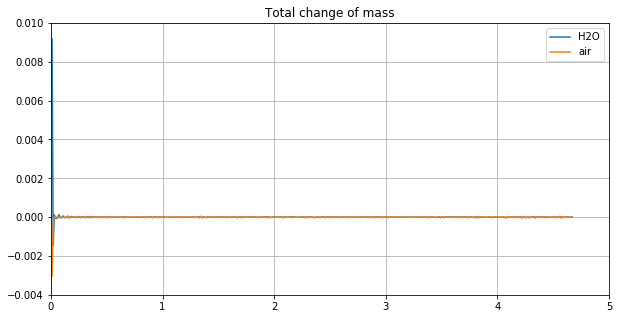

In [9]:
vapor_mass_diff = np.diff(mass['rhoH2O'], prepend=mass['rhoH2O'][0])/0.01

plt.title('Total change of mass')
plt.plot(mass['Time'], 
         vapor_mass_diff + 
         vapor_flow['leftLet'] + 
         vapor_flow['rightLet'] + 
         condensation['topAir_to_wall'], label='H2O')


air_mass_diff = np.diff(mass['rhoAIR'], prepend=mass['rhoAIR'][0])/0.01

plt.plot(mass['Time'], 
         air_mass_diff + 
         air_flow['leftLet'] + air_flow['rightLet'], 
         label='air')
plt.legend()
plt.grid(True)
plt.show()